In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
df = pd.read_csv("marketing.csv")
df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


Aislamos las filas del dataset de "marketing_channel" y "email"

In [9]:
email = df[df['marketing_channel'] =='Email']

Agrupamos por variante y sumamos los usuarios unicos en alloc

In [11]:
alloc = email.groupby(["variant"]) ["user_id"].nunique()

Graficamos los resultados

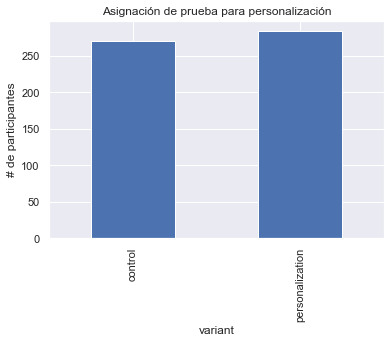

In [12]:
alloc.plot(kind="bar")
plt.title("Asignación de prueba para personalización")
plt.ylabel("# de participantes")
plt.show()

Agrupemos a marketing por id del usario y la variante

In [15]:
suscribers = email.groupby(["user_id", "variant"])["converted"].max()
suscribers_df = pd.DataFrame(suscribers.unstack(level=1))

Eliminamos los valores nulos de la columna de control

In [16]:
control = suscribers_df["control"].dropna()

Eliminamos los valores faltantes de la columna de personalizacion

In [17]:
personalization = suscribers_df["personalization"].dropna()

In [18]:
print("Control convertion rate:", np.mean(control))
print("Personalization conversion rate", np.mean(personalization))

Control convertion rate: 0.2814814814814815
Personalization conversion rate 0.3908450704225352


TESTING: LIFT

In [23]:
def lift(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    #Calculamos el lift usando a_mean y b_mean
    
    lift = (b_mean-a_mean)/a_mean
    return str(round(lift*100, 2)) + "%"     
    

In [24]:
print (lift(control,personalization))

38.85%


Prueba T student

In [25]:
from scipy.stats import ttest_ind

In [27]:
t = ttest_ind(control, personalization)
t

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)